In [2]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential,load_model,save_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
import numpy as np

In [3]:
def normalize_img(X):
    X_min = X.min(axis=(0, 1), keepdims=True)
    X_max = X.max(axis=(0, 1), keepdims=True)
    return (X - X_min)/(X_max - X_min)

In [4]:
batch_size = 64
target_size = (64, 64)
input_shape=(64, 64, 3)
seed=1337
adam = 0.001
fre= -20
FC = 2048
E = 1
patience = 3
verbose = 1
factor = 0.50
min_lr = 0.0001
steps_per_epoch=256
validation_steps=256
epochs=8

In [5]:
base_model = tf.keras.applications.VGG16(input_shape=input_shape,include_top=False,weights="imagenet")
model=Sequential()
model.add(base_model)
model.add(layers.Dropout(.2))

model.add(Conv2D(512, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.Dropout(.1))
model.add(Conv2D(128, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.Dropout(.1))
model.add(Conv2D(384, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.Dropout(.1))
model.add(Conv2D(384, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.Dropout(.1))
model.add(Conv2D(500, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,strides=(2,2), padding='same'))



# Add new layers
model.add(Flatten())
model.add(Dense(FC , activation='relu'))
model.add(layers.Dropout(.2))
model.add(Dense(FC , activation='relu'))
model.add(layers.Dropout(.2))
model.add(Dense(FC, activation='relu'))
model.add(layers.Dropout(.2))
model.add(Dense(E, activation='sigmoid'))

model.compile(optimizer=Adam(adam),
              loss='binary_crossentropy'
              ,metrics=['accuracy'])

lrd = ReduceLROnPlateau(monitor = 'val_loss',
                        patience = patience,
                        verbose = verbose ,
                        factor = factor,
                        min_lr = min_lr)

model.load_weights("model_vgg16.h5")

In [6]:
test_datagen = ImageDataGenerator( rescale = 1.0/255)
test_generator =  test_datagen.flow_from_directory( 'I:\study\dpl\project\Dataset\Test',
                                                          batch_size  = 20000,
                                                          class_mode  = 'binary',
                                                          seed=seed,
                                                          target_size = target_size)

Found 20001 images belonging to 2 classes.


In [7]:
images, actual = next(test_generator)
classes = model.predict(images, batch_size=batch_size)
predicted = np.round(classes)

313/313 [==============================] - 193s 613ms/step


In [8]:
test_datagen = ImageDataGenerator( rescale = 1.0/255)
test_generator =  test_datagen.flow_from_directory( 'I:\study\dpl\project\Dataset\Test',
                                                          batch_size  = batch_size,
                                                          class_mode  = 'binary',
                                                          seed=seed,
                                                          target_size = target_size)

Found 20001 images belonging to 2 classes.


In [9]:
score = model.evaluate_generator(generator=test_generator,steps=256)
print(score)

C:\Users\asus\AppData\Local\Temp\ipykernel_11316\2161322666.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(generator=test_generator,steps=256)


[0.11423312872648239, 0.9605712890625]


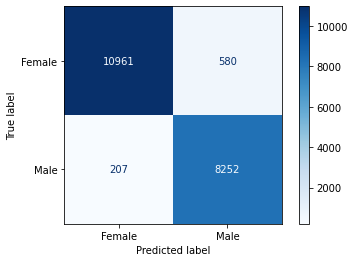

In [10]:
import matplotlib.pyplot as plt
from sklearn import metrics


metrics.ConfusionMatrixDisplay.from_predictions(actual,predicted, display_labels = ['Female', 'Male'],cmap=plt.cm.Blues)
plt.show()

1/1 [==============================] - 0s 78ms/step
[0.99944127]
This is a male


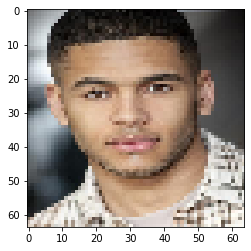

In [12]:
import numpy as np
import keras.utils as image
import  matplotlib.pyplot as plt

#  images test 2
path_testmodel = "I:/study/dpl/project/Dataset/testmodel/male/test4.jpg"
imged = image.load_img(path_testmodel, target_size=target_size)
X = image.img_to_array(imged)
X = np.expand_dims(X, axis=0)
X = normalize_img(X)


imag = np.vstack([X])
classes = model.predict(imag, batch_size=1)
print(classes[0])
if classes[0]>0.5:
    print("This is a male")
else:
    print( "This is a female")

plt.imshow(imged)